In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## 11th section
heat transfer numerical solution

In [2]:
L = 10
x_range = np.arange(0,L , 1)
x_range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 500
Iteration 550
Iteration 600
Iteration 650
Iteration 700
Iteration 750
Iteration 800
Iteration 850
Iteration 900
Iteration 950
Iteration 1000


Text(0.5, 1.0, 'Simplest default with labels')

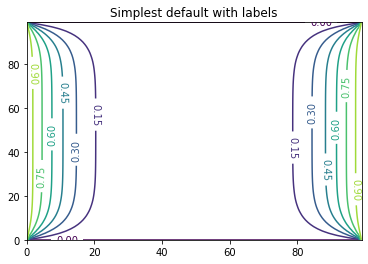

In [3]:
L = 100
H = 100
x_range = np.arange(0,L , 1)
y_range = np.arange(0,H , 1)
u = np.zeros((L,H))
iteration = 0
# Boundary conditions
u[0,:] = 0
u[L-1,:] = 0
u[:,0] = 1
u[:,H-1] = 1

# other conditions
# u[:,0] = 1
# u[:,H-1] = np.sin(2*np.pi*x_range/L)

while iteration < 1000:
    iteration += 1
    if iteration % 50 == 0:
        print(f'Iteration {iteration}')
        
        #use this to save countour plot every 50 iterations
        # fig, ax = plt.subplots()
        # cs = ax.contourf(x_range, y_range, u, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
        # cbar = fig.colorbar(cs)
        # plt.savefig(f'{iteration}.png')


    # it's important to copy the array before changing it
    ### usisng Lu = u won't work because the array will be changed
    Lu = u.copy()
    # ---------------------------------------------------------------
    # option 1: 5 point stencil
    for i in range(1,L-1):
        for j in range(1,H-1):
            Lu[i , j] = 1* (-4*u[i,j] + u[i,j+1] + u[i-1,j] + u[i+1,j] + u[i,j-1])
            
    # option 2: 8 point stencil
    # for i in range(1,L-1):
    #     for j in range(1,H-1):
    #         Lu[i , j] = (-8*u[i,j] + u[i,j+1] + u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i-1,j-1] + u[i-1,j+1] + u[i+1,j-1] + u[i+1,j+1])
    # ---------------------------------------------------------------
    u[1:L-1,1:H-1] = u[1:L-1,1:H-1] + 0.1 * Lu[1:L-1,1:H-1]
    
# plot the result 
fig, ax = plt.subplots()
CS = ax.contour(x_range, y_range, u)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')


### Analytic solution to the heat equation(without itteration)

Text(0.5, 1.0, 'Simplest default with labels')

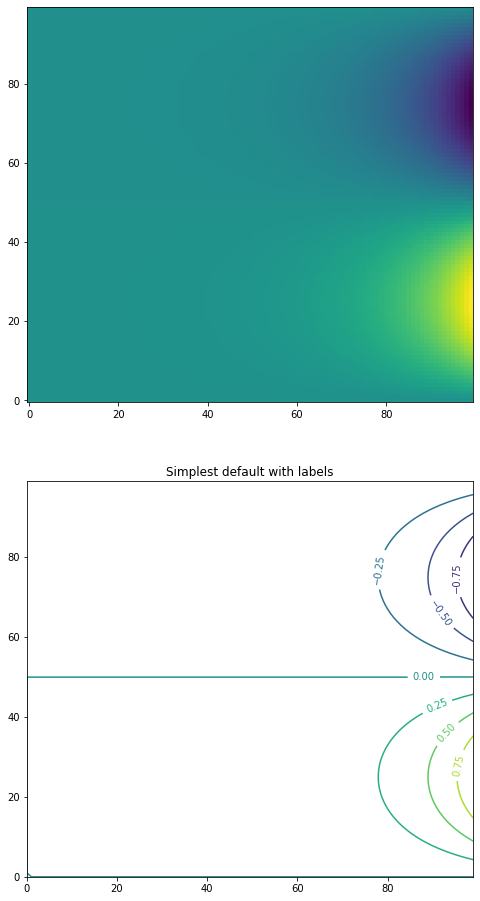

In [4]:
L = 100
H = 100
u = np.zeros((L,H))
x_range = np.arange(0,L , 1)
y_range = np.arange(0,H , 1)
x , y = np.meshgrid(x_range, y_range)

BC = np.sin(2 * np.pi * y_range / L)
A2 = (2/(H*np.sinh(2*np.pi*L/H))) * np.sum(BC**2)
u = A2 * (np.sin(2*np.pi*y/H) * np.sinh(2*np.pi*x/L))


fig, ax = plt.subplots(2 , figsize=(8,16))
CS = ax[0].pcolormesh(x, y, u)

CS = ax[1].contour(x, y, u)
ax[1].clabel(CS, inline=True, fontsize=10)
ax[1].set_title('Simplest default with labels')


### solution for a nastier BC

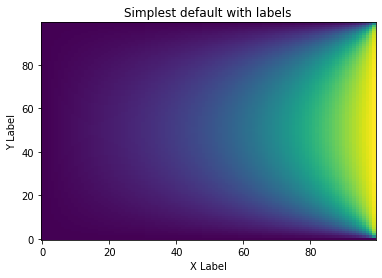

In [5]:
L = 100
H = 100
u = np.zeros((L,H))
x_range = np.arange(0,L , 1)
y_range = np.arange(0,H , 1)
x , y = np.meshgrid(x_range, y_range)

BC = np.ones([H])

# k shouldn't be zero
for k in range(1 , 100):
    AK = (2/(H*np.sinh(k *np.pi*L/H))) * np.sum(BC*np.sin(k * np.pi * y_range / H))
    u = u + AK * np.sin(k * np.pi * y / H) * np.sinh(k * np.pi * x / L)

fig , ax = plt.subplots()
ax.pcolormesh(x, y, u)
ax.set_title('Simplest default with labels')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()